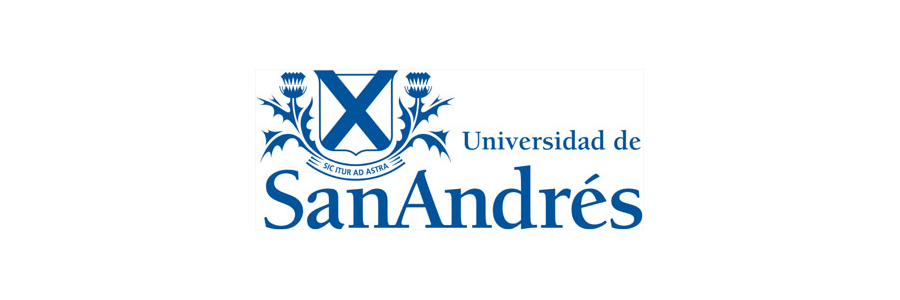

### Entropía de una variable aleatoria discreta:

La entropía se utiliza para medir la incertidumbre o la sorpresa asociada con un evento o una variable aleatoria. En términos sencillos, representa cuánta información se necesita para describir o predecir un evento o variable aleatoria. La entropía máxima ocurre cuando todos los resultados son igualmente probables, y la entropía es igual al logaritmo en base 2 del número de resultados posibles. La entropía es mínima (cero) cuando solo hay un resultado posible (probabilidad 1) y, por lo tanto, no hay incertidumbre. 

La entropía se puede interpretar como la cantidad promedio de bits necesarios para codificar la información de la variable aleatoria X. Cuanto mayor sea la entropía, más incertidumbre hay y más bits se necesitan para describir la variable.

La fórmula típica para calcular la entropía de una variable aleatoria discreta X con un conjunto de posibles resultados es:
$$
\begin{align}
H(X) &= -\sum_{x \in X} p(x) \log p(x) \\
\end{align}
$$



A continuación se calculan las entropías de distintos conjunto de datos que fueron extraídos de la naturaleza, hojas de 2 clases de arbustos. Se dispone de las medidas de los anchos y largos de ambas clases de hojas (C1 y C2).

In [38]:
import numpy as np
import pandas as pd

In [39]:
def entropy(prob: np.array) -> float:
    H = 0
    for i in range(prob.shape[0]):
        if prob[i] != 0:
            H += prob[i] * np.log2(prob[i])
    return -H

In [40]:
# Se lee el archivo CSV
data = pd.read_csv('DatasetHojas.csv', sep=',', header=0)
data_clase1 = data[data['Clase'] == 1]
data_clase2 = data[data['Clase'] == 2]

# Se separan los datos de cada clase en sus respectivas variables
largo_clase1 = data_clase1['Largo']
ancho_clase1 = data_clase1['Ancho']
largo_clase2 = data_clase2['Largo']
ancho_clase2 = data_clase2['Ancho']


In [41]:
n_bins = 5

hist_ancho_clase1 = np.histogram(ancho_clase1, bins=n_bins)
hist_ancho_clase2 = np.histogram(ancho_clase2, bins=n_bins)
hist_largo_clase1 = np.histogram(largo_clase1, bins=n_bins)
hist_largo_clase2 = np.histogram(largo_clase2, bins=n_bins)

prob_ancho_clase1 = hist_ancho_clase1[0] / np.sum(hist_ancho_clase1[0])
prob_ancho_clase2 = hist_ancho_clase2[0] / np.sum(hist_ancho_clase2[0])
prob_largo_clase1 = hist_largo_clase1[0] / np.sum(hist_largo_clase1[0])
prob_largo_clase2 = hist_largo_clase2[0] / np.sum(hist_largo_clase2[0])


print("Entropía de ancho de clase 1, H(A1): ", entropy(prob_ancho_clase1))
print("Entropía de ancho de clase 2, H(A2): ", entropy(prob_ancho_clase2))
print("Entropía de largo de clase 1, H(L1): ", entropy(prob_largo_clase1))
print("Entropía de largo de clase 2, H(L2): ", entropy(prob_largo_clase2))

Entropía de ancho de clase 1, H(A1):  1.84155491187079
Entropía de ancho de clase 2, H(A2):  1.7906927146926774
Entropía de largo de clase 1, H(L1):  1.7206031643621587
Entropía de largo de clase 2, H(L2):  1.728481135079078


### Entropía conjunta de un par de variables aleatorias discretas:

La entropía conjunta mide cuánta incertidumbre hay en la combinación de los valores de X e Y. Si la entropía conjunta es alta, significa que la combinación de X e Y es altamente incierta y contiene mucha información. Si la entropía conjunta es baja, implica que la combinación de X e Y es predecible o que las variables están relacionadas de alguna manera, lo que introduce una noción de que tan indepenidientes son los datos.

A continuación se detalla la fórmula:

$$ H(X,Y) = - \sum_{x \in X} \sum_{y \in Y} \ p(x,y) \log p(x,y) $$


In [42]:
hist_clase1, _, _ = np.histogram2d(largo_clase1, ancho_clase1, bins=5)
joint_prob_clase1 = hist_clase1 / np.sum(hist_clase1)

hist_clase2, _, _ = np.histogram2d(largo_clase2, ancho_clase2, bins=5)
joint_prob_clase2 = hist_clase2 / np.sum(hist_clase2)

def joint_entropy(prob: np.ndarray) -> float:
    """ Calcula la entropía conjunta de una matriz de probabilidades """
    H = 0
    for i in range(prob.shape[0]):
        for j in range(prob.shape[1]):
            if prob[i][j] != 0:
                H += prob[i][j] * np.log2(prob[i][j])
    return -H

print('Entropía conjunta clase 1, H(A1,L1) =',joint_entropy(joint_prob_clase1))
print('Entropía conjunta clase 2, H(A2,L2) =:',joint_entropy(joint_prob_clase2))

Entropía conjunta clase 1, H(A1,L1) = 3.0321465454645993
Entropía conjunta clase 2, H(A2,L2) =: 2.853608585978931


### Entropía condicional

La entropía condicional mide cuánta información adicional se necesita para describir $Y$
dado que ya se conoce $X$. Si $H(Y|X)$ es alto, significa que $Y$ es altamente incierto o independiente de $X$, en cambio si es bajo, podemos decir que $Y$ es predecible o dependiente de $X$.
$$
\begin{align}
H(Y|X) &= \sum_{x \in X} \ p(x) \, H(Y|X = x) \\
&= - \sum_{x \in X} \ p(x) \sum_{y \in Y} \ p(y|x) \log p(y|x) \\
&= - \sum_{x \in X} \sum_{y \in Y} \ p(x,y) \log p(y|x) \\
&= - E \, \log p(Y|X) \\
\end{align}
$$

In [43]:
def conditional_distribution(joint_probability: np.ndarray)-> np.ndarray:
    """ Calcula la probabilidad condicional dada la probabilidad conjunta """
    conditional_prob = np.zeros(joint_probability.shape)
    for i in range(joint_probability.shape[0]):
        for j in range(joint_probability.shape[1]):
            conditional_prob[i][j] = joint_probability[i][j] / np.sum(joint_probability[i])
    return conditional_prob

conditional_prob_clase1 = conditional_distribution(joint_prob_clase1)
conditional_prob_clase2 = conditional_distribution(joint_prob_clase2)

def conditional_entropy(conditional_prob: np.ndarray, joint_prob: np.ndarray) -> float:
    """ Calcula la entropía condicional de una matriz de probabilidades """
    H = 0
    for i in range(conditional_prob.shape[0]):
        for j in range(conditional_prob.shape[1]):
            if conditional_prob[i][j] != 0:
                H += joint_prob[i][j] * np.log2(conditional_prob[i][j])
    return -H

print('Entropía condicional clase 1, (A1|L1):',conditional_entropy(conditional_prob_clase1, joint_prob_clase1))
print('Entropía condicional clase 2, (A2|L2):',conditional_entropy(conditional_prob_clase2, joint_prob_clase2))


Entropía condicional clase 1, (A1|L1): 1.3115433811024402
Entropía condicional clase 2, (A2|L2): 1.1251274508998534


#### Ahora las condicionales pero entre los anchos $H(A_1 | A_2)$ y los largos $H(L_1 | L_2)$

In [44]:
ancho1 = np.array(ancho_clase1)[:ancho_clase2.shape[0]]
largo1 = np.array(largo_clase1)[:largo_clase2.shape[0]]

hist_anchos, _, _ = np.histogram2d(ancho_clase2, ancho1, bins=5)
joint_prob_anchos = hist_anchos / np.sum(hist_anchos)

hist_largos, _, _ = np.histogram2d(largo_clase2, largo1, bins=5)
joint_prob_largos = hist_largos / np.sum(hist_largos)

In [45]:
conditional_prob_anchos = conditional_distribution(joint_prob_anchos)
conditional_prob_largos = conditional_distribution(joint_prob_largos)

print('Entropía condicional anchos, H(A1|A2) =',conditional_entropy(conditional_prob_anchos, joint_prob_anchos))
print('Entropía condicional largos, H(L1|L2) =',conditional_entropy(conditional_prob_largos, joint_prob_largos))


Entropía condicional anchos, H(A1|A2) = 1.8468602935137588
Entropía condicional largos, H(L1|L2) = 1.8522168000712587


### La información mutua entre dos variables aleatorias discretas $I(X;Y)$ es la entropía relativa entre la probabilidad conjunta y el producto de las probabilidades marginales:

La información mutua, denotada como $I(X;Y)$, es un concepto importante en la teoría de la información y la teoría de la probabilidad que mide cuánta información comparten o cuánta dependencia mutua existe entre dos variables aleatorias, 
$X$ e $Y$. La información mutua se utiliza para cuantificar cuánta información se gana al observar una de las variables cuando se conoce la otra.
\begin{aligned}
I(X;Y) &= \sum_{x \in X} \sum_{y \in Y} \ p(x,y) \log \frac{p(x,y)}{p(x) p(y)} \\
\end{aligned}

##### Por regla de la cadena, se puede escribir como:
$$ I(X;Y) = H(X) - H(X|Y) $$

In [46]:
def mutual_information(marg_prob_X, marg_prob_Y, joint_prob) -> float:
    I = 0
    for x in range(marg_prob_X.shape[0]):
        for y in range(marg_prob_Y.shape[0]):
            if joint_prob[x][y] != 0:
                I += joint_prob[x][y] * np.log2(joint_prob[x][y] / (marg_prob_X[x] * marg_prob_Y[y]))
    return I

hist_clase1, _, _ = np.histogram2d(largo_clase1, ancho_clase1, bins=5)
joint_prob_clase1 = hist_clase1 / np.sum(hist_clase1)

marginal_largo_clase1 = np.sum(joint_prob_clase1, axis=1)
marginal_ancho_clase1 = np.sum(joint_prob_clase1, axis=0)

print('Información mutua clase 1, I(A1; L1) =',mutual_information(marginal_largo_clase1, marginal_ancho_clase1, joint_prob_clase1))

# Lo mismo para ancho1 y ancho2
ancho1 = np.array(ancho_clase1)[:ancho_clase2.shape[0]]
ancho2 = ancho_clase2

hist_anchos, _, _ = np.histogram2d(ancho1, ancho2, bins=5)
joint_prob_anchos = hist_anchos / np.sum(hist_anchos)

marginal_ancho1 = np.sum(joint_prob_anchos, axis=1)
marginal_ancho2 = np.sum(joint_prob_anchos, axis=0)

print('Información mutua entre anchos, I(A1; A2) =',mutual_information(marginal_ancho1, marginal_ancho2, joint_prob_anchos))


Información mutua clase 1, I(A1; L1) = 0.5300115307683494
Información mutua entre anchos, I(A1; A2) = 0.0796008638042334


In [47]:
# Corroboración
hist_clase1, _, _ = np.histogram2d(ancho_clase1, largo_clase1, bins=5)
joint_prob_clase1 = hist_clase1 / np.sum(hist_clase1)
conditional_prob_clase1 = conditional_distribution(joint_prob_clase1)
I_clase_1 = entropy(prob_largo_clase1) - conditional_entropy(conditional_prob_clase1, joint_prob_clase1)
print('Información mutua I(L1;A1) =',mutual_information(prob_ancho_clase1, prob_largo_clase1, joint_prob_clase1))
print('Información mutua H(L1) - H(L1|A1) =', I_clase_1)
#quedarse con los 3 primeros decimales
if round(I_clase_1, 3) == round(mutual_information(prob_ancho_clase1, prob_largo_clase1, joint_prob_clase1), 3):
    print('La información mutua I(L1;A1) es igual a la diferencia entre la entropía de L1 y la entropía condicional de L1 dado A1 \n')

hist_clase2, _, _ = np.histogram2d(ancho_clase2, largo_clase2, bins=5)
joint_prob_clase2 = hist_clase2 / np.sum(hist_clase2)
conditional_prob_clase2 = conditional_distribution(joint_prob_clase2)
I_clase_2 = entropy(prob_largo_clase2) - conditional_entropy(conditional_prob_clase2, joint_prob_clase2)
print('Información mutua I(L2;A2) =', I_clase_2)
print('Información mutua H(L2) - H(L2|A2) =',mutual_information(prob_ancho_clase2, prob_largo_clase2, joint_prob_clase2))
if round(I_clase_2, 3) == round(mutual_information(prob_ancho_clase2, prob_largo_clase2, joint_prob_clase2), 3):
    print('La información mutua I(L2;A2) es igual a la diferencia entre la entropía de L2 y la entropía condicional de L2 dado A2 \n')


Información mutua I(L1;A1) = 0.5300115307683496
Información mutua H(L1) - H(L1|A1) = 0.5300115307683493
La información mutua I(L1;A1) es igual a la diferencia entre la entropía de L1 y la entropía condicional de L1 dado A1 

Información mutua I(L2;A2) = 0.6655652637928242
Información mutua H(L2) - H(L2|A2) = 0.6655652637928238
La información mutua I(L2;A2) es igual a la diferencia entre la entropía de L2 y la entropía condicional de L2 dado A2 



### Entropía relativa o distancia de Kullback-Leibler entre dos distribuciones de probabilidad $p$ y $q$:

La entropía relativa, también conocida como la distancia de Kullback-Leibler (KL), es una medida que cuantifica la diferencia o la divergencia entre dos distribuciones de probabilidad, $p(x)$ y $q(x)$. Esta medida se utiliza para determinar cuánta información se pierde cuando se representa $p$ con respecto a $q$.
\begin{aligned}
D_{KL}(p||q) &= \sum_{x \in X} \ p(x) \log \frac{p(x)}{q(x)} \\
&= E_p \log \frac{p(X)}{q(X)} \\
\end{aligned}

A continuación se calcula la divergencia entre las conjuntas de las ambas clases de hojas. La fórmula es:
\begin{equation}
D_{KL}(p(x, y) || q(x, y)) = \sum_x \sum_y p(x, y) \log\left(\frac{p(x, y)}{q(x, y)}\right)
\end{equation}

In [48]:
def relative_entropy(P: np.ndarray, Q: np.ndarray) -> float:
    D = 0
    for p in range(P.shape[0]):
        for q in range(Q.shape[1]):
            if P[p][q] != 0 and Q[p][q] != 0:
                D += P[p][q] * np.log2(P[p][q] / Q[p][q])
    return D

In [49]:
print('Entropía relativa entre la conjunta de las clases, D(C1||C2) =',relative_entropy(joint_prob_clase1, joint_prob_clase2))

Entropía relativa entre la conjunta de las clases, D(C1||C2) = 0.24180405291993165
